# ADNI Dataset Analysis
This notebook provides a comprehensive analysis of the ADNI dataset.


## Importing Libraries


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Load Dataset

In [2]:
file_path = '/content/ADNI1_Complete_3Yr_1.5T_12_02_2024.csv'

In [3]:
data = pd.read_csv(file_path)
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I63874,941_S_1202,CN,M,78,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
1,I204843,941_S_1202,CN,M,81,m36,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/14/2010,NiFTI,NaN
2,I137298,941_S_1202,CN,M,80,m24,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/17/2009,NiFTI,NaN
3,I75150,941_S_1202,CN,M,78,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN
4,I105437,941_S_1202,CN,M,79,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,NaN


## Dataset Overview

In [4]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  2182 non-null   object 
 1   Subject        2182 non-null   object 
 2   Group          2182 non-null   object 
 3   Sex            2182 non-null   object 
 4   Age            2182 non-null   int64  
 5   Visit          2182 non-null   object 
 6   Modality       2182 non-null   object 
 7   Description    2182 non-null   object 
 8   Type           2182 non-null   object 
 9   Acq Date       2182 non-null   object 
 10  Format         2182 non-null   object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 204.7+ KB


In [6]:
# Display basic statistics
data.describe()

,Age,Downloaded
count,2182.000000,0.0
mean,76.225023,NaN
std,6.803070,NaN
min,55.000000,NaN
25%,72.250000,NaN
50%,76.000000,NaN
75%,81.000000,NaN
max,93.000000,NaN


## Visualization

### Distribution of Groups

<ipython-input-7-484eb3bb5260>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")


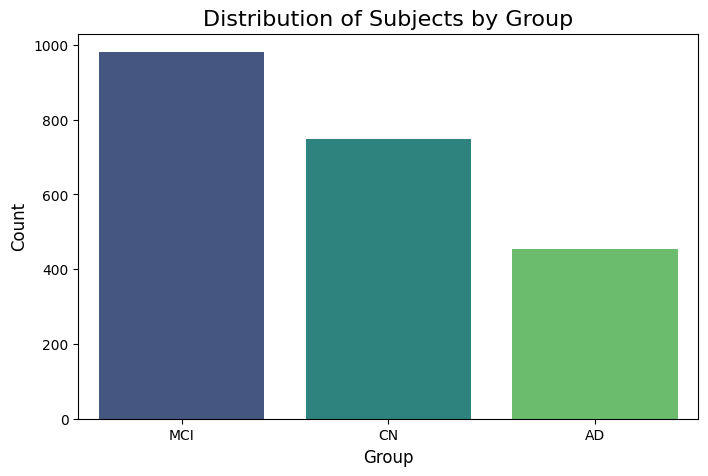

In [7]:
group_counts = data['Group'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.title("Distribution of Subjects by Group", fontsize=16)
plt.xlabel("Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

### Age Distribution by Group

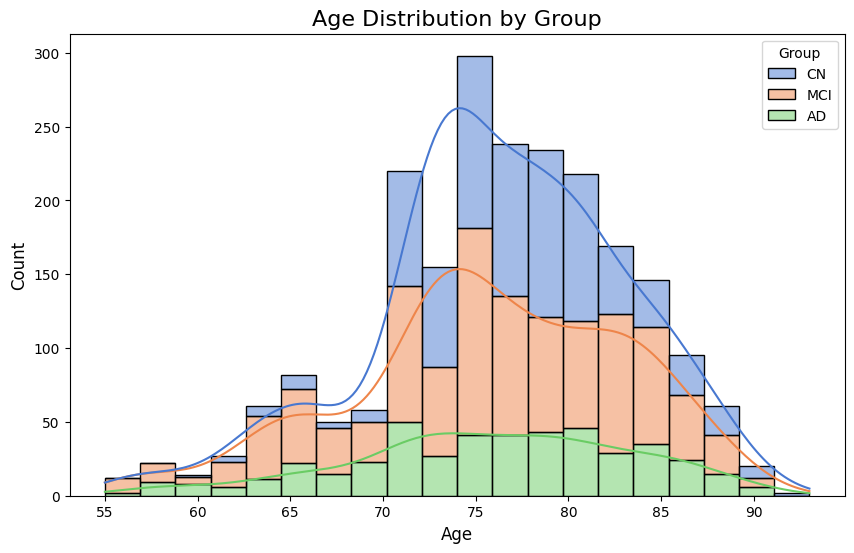

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Group', multiple='stack', kde=True, palette="muted", bins=20)
plt.title("Age Distribution by Group", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

### Gender Distribution by Group

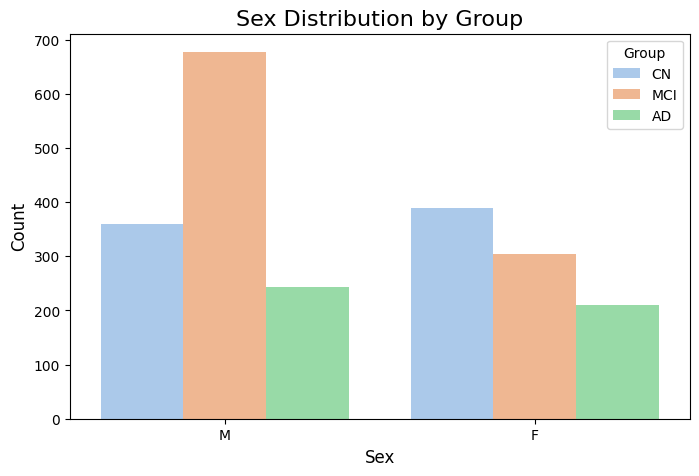

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sex', hue='Group', palette="pastel")
plt.title("Sex Distribution by Group", fontsize=16)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Group")
plt.show()

### Visit Counts (Temporal Trends)

<ipython-input-10-45e6d64028ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")


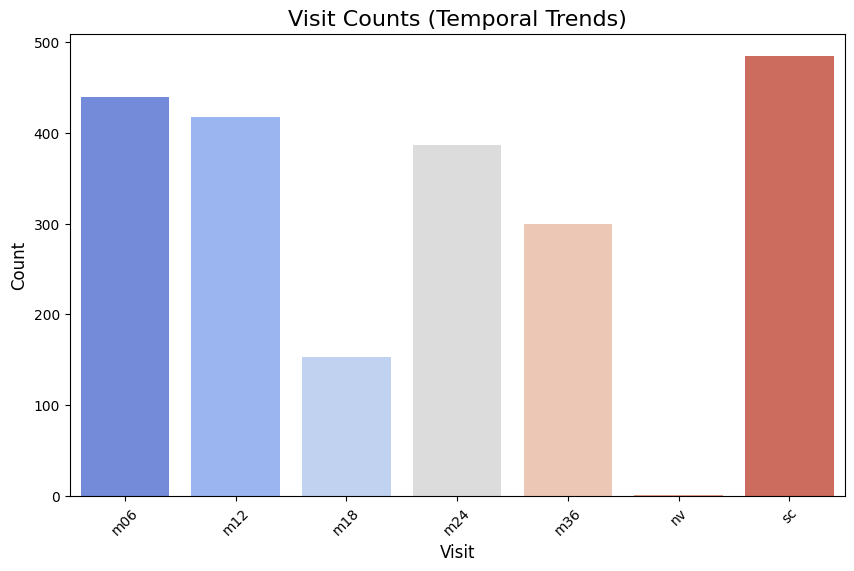

In [10]:
visit_counts = data['Visit'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")
plt.title("Visit Counts (Temporal Trends)", fontsize=16)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Imaging Modality Distribution

<ipython-input-11-4fa627f60946>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modality_counts.index, y=modality_counts.values, palette="Set2")


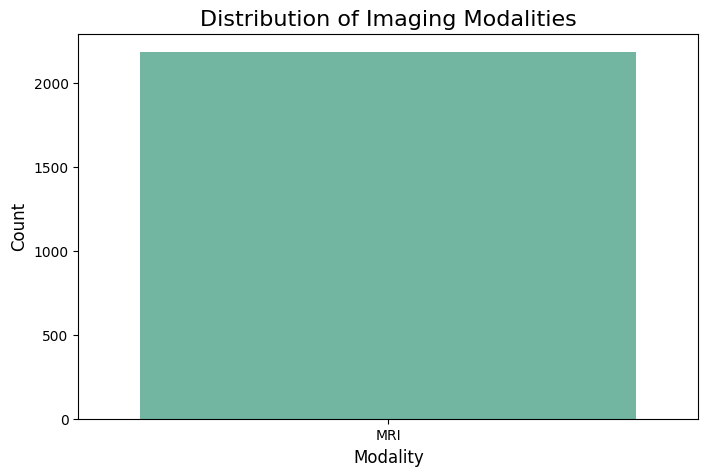

In [11]:
modality_counts = data['Modality'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=modality_counts.index, y=modality_counts.values, palette="Set2")
plt.title("Distribution of Imaging Modalities", fontsize=16)
plt.xlabel("Modality", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#### Correlation Analysis between Numerical Features (Age and Visits if encoded)

In [14]:
visit_mapping = {'sc': 0, 'm06': 6, 'm12': 12, 'm24': 24, 'm36': 36, 'bl': 0}
data['Visit_Months'] = data['Visit'].map(visit_mapping)

# Correlation matrix
correlation_matrix = data[['Age', 'Visit_Months']].corr()

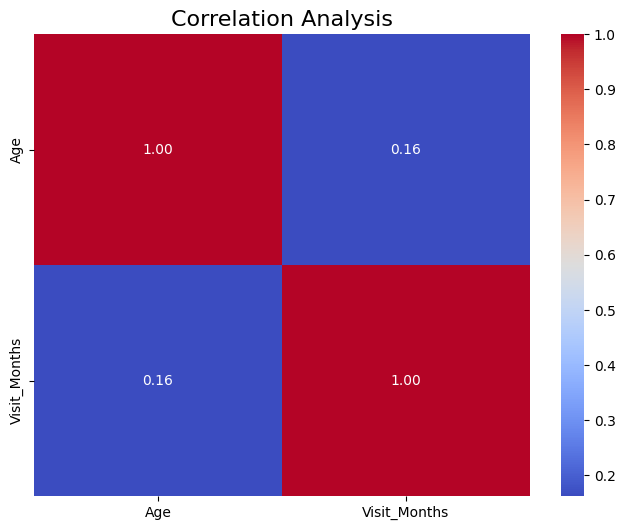

In [15]:
# Visualization for Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Analysis", fontsize=16)
plt.show()

### Statistical Test: Compare Age Distributions Across Groups (CN, AD, MCI)


In [16]:
groups = data['Group'].unique()
age_group_data = {group: data[data['Group'] == group]['Age'] for group in groups}

# Pairwise t-tests between groups
ttest_results = {
    (g1, g2): ttest_ind(age_group_data[g1], age_group_data[g2], equal_var=False)
    for i, g1 in enumerate(groups) for g2 in groups[i + 1:]
}

### Longitudinal Trends: Average Age Progression Across Visits by Group


In [17]:
longitudinal_trends = data.groupby(['Group', 'Visit_Months'])['Age'].mean().unstack()

<Figure size 1000x600 with 0 Axes>

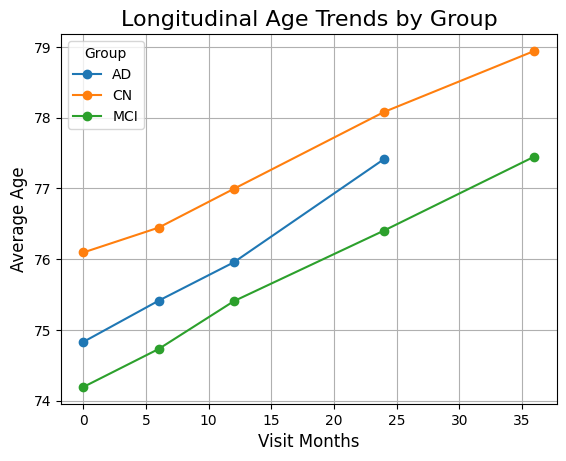

In [18]:
# Visualization for Longitudinal Trends
plt.figure(figsize=(10, 6))
longitudinal_trends.T.plot(marker='o')
plt.title("Longitudinal Age Trends by Group", fontsize=16)
plt.xlabel("Visit Months", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.legend(title="Group")
plt.grid(True)
plt.show()

### Return key insights

In [19]:
{
    "correlation_matrix": correlation_matrix,
    "ttest_results": ttest_results,
    "longitudinal_trends": longitudinal_trends
}


{'correlation_matrix':                    Age  Visit_Months
 Age           1.000000      0.162267
 Visit_Months  0.162267      1.000000,
 'ttest_results': {('CN',
   'MCI'): TtestResult(statistic=5.3897259915016615, pvalue=8.033625388668225e-08, df=1718.198065499986),
  ('CN',
   'AD'): TtestResult(statistic=3.582385990866772, pvalue=0.0003635419347247127, df=715.2588157827619),
  ('MCI',
   'AD'): TtestResult(statistic=-0.44475949169156237, pvalue=0.6566054842574444, df=859.9728061843206)},
 'longitudinal_trends': Visit_Months       0.0        6.0        12.0       24.0       36.0
 Group                                                              
 AD            74.830769  75.412281  75.954545  77.414141        NaN
 CN            76.094675  76.445161  76.993103  78.080292  78.943262
 MCI           74.193548  74.729412  75.404908  76.403974  77.449367}